# Exploratory Data Analysis with Pandas

![panda](http://res.freestockphotos.biz/thumbs/3/3173-illustration-of-a-giant-panda-eating-bamboo-th.png)

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

# Objectives

- Use lambda functions and DataFrame methods to transform data
- Handle missing data

# More Pandas

Suppose you were interested in opening an animal shelter. To inform your planning, it would be useful to analyze data from other shelters to understand their operations. In this lecture, we'll analyze animal outcome data from the Austin Animal Center.  

## Loading the Data

Let's take a moment to examine the [Austin Animal Center data set](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238/data). 

We can also ingest the data right off the web, as we do below. The code below will load JSON data for the last 1000 animals to leave the center from this [JSON file](https://data.austintexas.gov/resource/9t4d-g238.json). 

In [2]:
json_url = 'https://data.austintexas.gov/resource/9t4d-g238.json'
print(json_url)

https://data.austintexas.gov/resource/9t4d-g238.json


In [3]:
json_url = 'https://data.austintexas.gov/resource/9t4d-g238.json'
animals = pd.read_json(json_url)

In [4]:
type(animals)

pandas.core.frame.DataFrame

# Exploratory Data Analysis (EDA)

Exploring a new dataset is essential for understanding what it contains. This will generate ideas for processing the data and questions to try to answer in further analysis.

## Inspecting the Data

Let's take a look at a few rows of data.

In [5]:
animals.head(10)

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,A852444,Uno,2022-03-06 17:06:00,2022-03-06T17:06:00.000,2016-03-03T00:00:00.000,Return to Owner,Field,Dog,Neutered Male,6 years,Maltese,White
1,A852297,*Sampson,2022-03-06 13:42:00,2022-03-06T13:42:00.000,2020-03-01T00:00:00.000,Euthanasia,Suffering,Cat,Intact Male,NULL,Domestic Shorthair Mix,Orange Tabby
2,A832436,Floki,2022-03-06 11:59:00,2022-03-06T11:59:00.000,2020-09-15T00:00:00.000,Transfer,Partner,Dog,Neutered Male,1 year,Catahoula Mix,Blue Merle/White
3,A852624,NaN,2022-03-06 10:29:00,2022-03-06T10:29:00.000,2020-03-06T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,NULL,Bat,Brown
4,A852411,A852411,2022-03-06 00:00:00,2022-03-06T00:00:00.000,2021-07-02T00:00:00.000,Transfer,Partner,Other,Intact Male,8 months,Rabbit Sh,White
5,A850918,Kaia,2022-03-05 17:43:00,2022-03-05T17:43:00.000,2016-02-03T00:00:00.000,Adoption,NaN,Cat,Spayed Female,6 years,Domestic Shorthair Mix,White
6,A850917,Daphne,2022-03-05 17:43:00,2022-03-05T17:43:00.000,2016-02-03T00:00:00.000,Adoption,NaN,Cat,Spayed Female,6 years,Manx Mix,Torbie
7,A852574,Bean,2022-03-05 17:41:00,2022-03-05T17:41:00.000,2017-03-05T00:00:00.000,Return to Owner,NaN,Dog,Intact Female,5 years,Dachshund Longhair,Brown
8,A852044,Lily,2022-03-05 17:31:00,2022-03-05T17:31:00.000,2020-02-23T00:00:00.000,Adoption,NaN,Dog,Spayed Female,2 years,Australian Shepherd Mix,Red/White
9,A850256,Ghost,2022-03-05 16:58:00,2022-03-05T16:58:00.000,2019-01-21T00:00:00.000,Adoption,NaN,Dog,Neutered Male,3 years,Staffordshire,Blue/White


The `info()` and `describe()` provide a useful overview of the data.

In [6]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   animal_id         1000 non-null   object        
 1   name              867 non-null    object        
 2   datetime          1000 non-null   datetime64[ns]
 3   monthyear         1000 non-null   object        
 4   date_of_birth     1000 non-null   object        
 5   outcome_type      1000 non-null   object        
 6   outcome_subtype   422 non-null    object        
 7   animal_type       1000 non-null   object        
 8   sex_upon_outcome  1000 non-null   object        
 9   age_upon_outcome  1000 non-null   object        
 10  breed             1000 non-null   object        
 11  color             1000 non-null   object        
dtypes: datetime64[ns](1), object(11)
memory usage: 93.9+ KB


> We can see we have some missing data. Specifically in the `outcome_type`, `outcome_subtype`, and `name` columns.

In [7]:
animals.describe()

C:\Users\lokma\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
count,1000,867,1000,1000,1000,1000,422,1000,1000,1000,1000,1000
unique,983,792,893,893,518,7,15,4,5,35,180,122
top,A851219,Daisy,2022-02-09 15:30:00,2022-02-09T15:30:00.000,2020-03-01T00:00:00.000,Adoption,Partner,Dog,Neutered Male,2 years,Domestic Shorthair,Black/White
freq,2,6,5,5,21,541,146,649,355,253,158,119
first,NaN,NaN,2022-01-30 13:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-03-06 17:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Use value counts to check a categorical feature's distribution

animals['color'].value_counts()

Black/White             119
Black                    51
White                    49
Black/Brown              40
Brown Tabby              40
                       ... 
Black Brindle/Tan         1
Yellow Brindle/Brown      1
Fawn/Tan                  1
Silver                    1
White/Red Tick            1
Name: color, Length: 122, dtype: int64

Now that we have a sense of the data available to us, we can focus in on some more specific questions to dig into. These questions may or may not be directly relevant to your goal (e.g. helping plan a new shelter), but will always help you gain a better understanding of your data.

In your EDA notebooks, **markdown** will be especially helpful in tracking these questions and your methods of answering the questions.

## Question 1: What animal types are in the dataset?

We can then begin thinking about what parts of the DataFrame we need to answer the question.

* What features do we need?
 - "animal_type"
* What type of logic and calculation do we perform?
 - Let's use `.value_counts()` to count the different animal types
* What type of visualization would help us answer the question?
 - A bar chart would be good for this purpose

In [9]:
animals.columns

Index(['animal_id', 'name', 'datetime', 'monthyear', 'date_of_birth',
       'outcome_type', 'outcome_subtype', 'animal_type', 'sex_upon_outcome',
       'age_upon_outcome', 'breed', 'color'],
      dtype='object')

In [10]:
animals['animal_type'].value_counts()

Dog      649
Cat      265
Other     64
Bird      22
Name: animal_type, dtype: int64

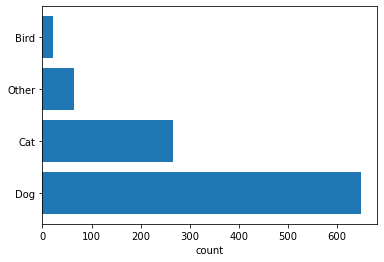

In [11]:
fig, ax = plt.subplots()

animal_type_values = animals['animal_type'].value_counts()

ax.barh(
    y=animal_type_values.index,
    width=animal_type_values.values
)
ax.set_xlabel('count');

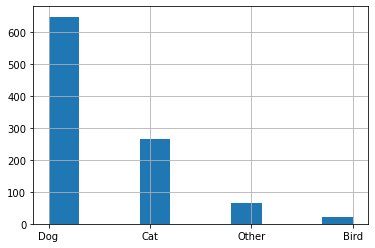

In [12]:
animals['animal_type'].hist();

Questions lead to other questions. For the above example, the visualization raises the question...

## Question 2: What "Other" animals are in the dataset?

To find out, we need to know whether the type of animal for "Other" is in our dataset - and if so, where to find it.   

**Discussion**: Where might we look to find animal types within the Other category?

<details>
    <summary>
        Answer
    </summary>
        The breed column.
</details>

In [13]:
# Your exploration here
animals.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,A852444,Uno,2022-03-06 17:06:00,2022-03-06T17:06:00.000,2016-03-03T00:00:00.000,Return to Owner,Field,Dog,Neutered Male,6 years,Maltese,White
1,A852297,*Sampson,2022-03-06 13:42:00,2022-03-06T13:42:00.000,2020-03-01T00:00:00.000,Euthanasia,Suffering,Cat,Intact Male,NULL,Domestic Shorthair Mix,Orange Tabby
2,A832436,Floki,2022-03-06 11:59:00,2022-03-06T11:59:00.000,2020-09-15T00:00:00.000,Transfer,Partner,Dog,Neutered Male,1 year,Catahoula Mix,Blue Merle/White
3,A852624,NaN,2022-03-06 10:29:00,2022-03-06T10:29:00.000,2020-03-06T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,NULL,Bat,Brown
4,A852411,A852411,2022-03-06 00:00:00,2022-03-06T00:00:00.000,2021-07-02T00:00:00.000,Transfer,Partner,Other,Intact Male,8 months,Rabbit Sh,White


Let's use that column to answer our question.

In [14]:
mask_other_animals = animals['animal_type'] == 'Other'
animals[mask_other_animals]['breed'].value_counts()

Raccoon       22
Bat           14
Rabbit Sh     13
Guinea Pig     9
Fox            2
Skunk          2
Ferret         2
Name: breed, dtype: int64

In [15]:
animals[mask_other_animals]

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
3,A852624,NaN,2022-03-06 10:29:00,2022-03-06T10:29:00.000,2020-03-06T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,NULL,Bat,Brown
4,A852411,A852411,2022-03-06 00:00:00,2022-03-06T00:00:00.000,2021-07-02T00:00:00.000,Transfer,Partner,Other,Intact Male,8 months,Rabbit Sh,White
13,A852594,NaN,2022-03-05 15:59:00,2022-03-05T15:59:00.000,2020-03-05T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,NULL,Raccoon,Black/Gray
27,A845563,George Hare-Ison,2022-03-05 13:35:00,2022-03-05T13:35:00.000,2019-11-01T00:00:00.000,Adoption,Foster,Other,Neutered Male,2 years,Rabbit Sh,White/Brown
35,A852548,NaN,2022-03-05 08:55:00,2022-03-05T08:55:00.000,2021-03-04T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,1 year,Skunk,Black/White
...,...,...,...,...,...,...,...,...,...,...,...,...
879,A850758,Max,2022-02-02 16:19:00,2022-02-02T16:19:00.000,2020-12-31T00:00:00.000,Transfer,Partner,Other,Intact Male,1 year,Guinea Pig,Tricolor
880,A850755,Tokyo,2022-02-02 16:18:00,2022-02-02T16:18:00.000,2020-01-31T00:00:00.000,Transfer,Partner,Other,Intact Female,2 years,Guinea Pig,Tricolor
881,A850754,Felix,2022-02-02 16:18:00,2022-02-02T16:18:00.000,2020-01-31T00:00:00.000,Transfer,Partner,Other,Neutered Male,2 years,Guinea Pig,Brown/White
955,A850716,NaN,2022-02-01 07:44:00,2022-02-01T07:44:00.000,2020-01-30T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,2 years,Raccoon,Tan/Gray


## Question 3: How old are the animals in our dataset?

Let's try to answer this with the `age_upon_outcome` variable to learn some new `pandas` tools.

In [16]:
animals['age_upon_outcome'].value_counts()

2 years      253
1 year       149
2 months     120
3 months      43
3 years       41
1 month       36
4 years       34
4 months      33
6 months      32
5 months      28
5 years       27
7 years       19
10 months     17
7 months      17
10 years      17
6 years       17
8 years       16
8 months      16
2 weeks       10
9 months      10
1 weeks        9
11 months      7
NULL           7
12 years       6
13 years       5
11 years       5
0 years        5
9 years        5
1 day          4
15 years       3
3 days         3
14 years       3
3 weeks        1
5 weeks        1
4 weeks        1
Name: age_upon_outcome, dtype: int64

### `Series.map()`

The `.map()` method applies a transformation to every entry in the Series. This transformation  "maps" each value from the Series to a new value. A transformation can be defined by a function, Series, or dictionary - usually we'll use functions.

The `.apply()` method is similar to the `.map()` method for Series, but can only use functions. It has more powerful uses when working with DataFrames.

In [17]:
def one_year(age):
    if age == '1 year':
        return '1 years'
    else:
        return age

In [18]:
animals['new_age1'] = animals['age_upon_outcome'].map(one_year)
animals['new_age1'].value_counts()

2 years      253
1 years      149
2 months     120
3 months      43
3 years       41
1 month       36
4 years       34
4 months      33
6 months      32
5 months      28
5 years       27
7 years       19
6 years       17
10 months     17
7 months      17
10 years      17
8 years       16
8 months      16
9 months      10
2 weeks       10
1 weeks        9
11 months      7
NULL           7
12 years       6
0 years        5
13 years       5
9 years        5
11 years       5
1 day          4
15 years       3
3 days         3
14 years       3
5 weeks        1
3 weeks        1
4 weeks        1
Name: new_age1, dtype: int64

### More Sophisticated Mapping

Let's use `.map()` to turn sex_upon_outcome into a category with three values (called **ternary**): male, female, or unknown. 

First, explore the unique values:

In [19]:
animals['sex_upon_outcome'].unique()

array(['Neutered Male', 'Intact Male', 'Unknown', 'Spayed Female',
       'Intact Female'], dtype=object)

In [20]:
def sex_mapper(status):
    if status in ['Neutered Male', 'Intact Male']:
        return 'Male'
    elif status in ['Spayed Female', 'Intact Female']:
        return 'Female'
    else:
        return 'Unknown'

In [21]:
animals['new_sex1'] = animals['sex_upon_outcome'].apply(sex_mapper)
animals.loc[:, ['sex_upon_outcome', 'new_sex1']]

,sex_upon_outcome,new_sex1
0,Neutered Male,Male
1,Intact Male,Male
2,Neutered Male,Male
3,Unknown,Unknown
4,Intact Male,Male
...,...,...
995,Intact Female,Female
996,Intact Female,Female
997,Unknown,Unknown
998,Intact Female,Female


### Lambda Functions

Simple functions can be defined just when you need them, when you would call the function. These are called **lambda functions**. These functions are **anonymous** and disappear immediately after use.

Let's use a lambda function to get rid of 'Other' in the "animal_type' column.

In [22]:
animals[animals['animal_type'] == 'Other']

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,new_age1,new_sex1
3,A852624,NaN,2022-03-06 10:29:00,2022-03-06T10:29:00.000,2020-03-06T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,NULL,Bat,Brown,NULL,Unknown
4,A852411,A852411,2022-03-06 00:00:00,2022-03-06T00:00:00.000,2021-07-02T00:00:00.000,Transfer,Partner,Other,Intact Male,8 months,Rabbit Sh,White,8 months,Male
13,A852594,NaN,2022-03-05 15:59:00,2022-03-05T15:59:00.000,2020-03-05T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,NULL,Raccoon,Black/Gray,NULL,Unknown
27,A845563,George Hare-Ison,2022-03-05 13:35:00,2022-03-05T13:35:00.000,2019-11-01T00:00:00.000,Adoption,Foster,Other,Neutered Male,2 years,Rabbit Sh,White/Brown,2 years,Male
35,A852548,NaN,2022-03-05 08:55:00,2022-03-05T08:55:00.000,2021-03-04T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,1 year,Skunk,Black/White,1 years,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,A850758,Max,2022-02-02 16:19:00,2022-02-02T16:19:00.000,2020-12-31T00:00:00.000,Transfer,Partner,Other,Intact Male,1 year,Guinea Pig,Tricolor,1 years,Male
880,A850755,Tokyo,2022-02-02 16:18:00,2022-02-02T16:18:00.000,2020-01-31T00:00:00.000,Transfer,Partner,Other,Intact Female,2 years,Guinea Pig,Tricolor,2 years,Female
881,A850754,Felix,2022-02-02 16:18:00,2022-02-02T16:18:00.000,2020-01-31T00:00:00.000,Transfer,Partner,Other,Neutered Male,2 years,Guinea Pig,Brown/White,2 years,Male
955,A850716,NaN,2022-02-01 07:44:00,2022-02-01T07:44:00.000,2020-01-30T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,2 years,Raccoon,Tan/Gray,2 years,Unknown


In [23]:
animals['animal_type'].value_counts()

Dog      649
Cat      265
Other     64
Bird      22
Name: animal_type, dtype: int64

In [24]:
type(np.nan)

float

In [25]:
animals['animal_type'].map(lambda x: np.nan if x == 'Other' else x).value_counts()

Dog     649
Cat     265
Bird     22
Name: animal_type, dtype: int64

In [26]:
animals['animal_type'].value_counts()

Dog      649
Cat      265
Other     64
Bird      22
Name: animal_type, dtype: int64

In [27]:
#animals['animal_type'] = animals['animal_type'].map(lambda x: np.nan if x == 'Other' else x)

# Handling Missing Data

A lot of the times we'll have missing information in our data set. This can sometimes be troublesome in what we're trying to do.

So far, we've been doing some preprocessing/cleaning to answer questions. Now we're going to handle the missing values in our data.

There are a few strategies we can choose from and they each have their special use case.

> Before making changes, it's convenient to make changes to a copy instead of overwriting data. We'll keep all our changes in `animals_clean` which will be a [copy](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html) of the original DataFrame.

In [28]:
animals_clean = animals.copy()

## Fill with a Relevant Value

A lot of times we already have an idea of how we want to specify that a value was missing and replace it with a value that makes more sense than an "empty" value.

For example, it might make sense to fill the value as "MISSING" or "UNKNOWN". This way it's clearer when do more analysis.

> We can use Pandas' [`fillna()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) to replace missing values with something specific

In [29]:
# Note this creates a copy of `animals` with the missing values replaced
animals_name_filled = animals_clean.fillna('np.nan') # {col_name:new_value}
animals_name_filled.head(10)

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,new_age1,new_sex1
0,A852444,Uno,2022-03-06 17:06:00,2022-03-06T17:06:00.000,2016-03-03T00:00:00.000,Return to Owner,Field,Dog,Neutered Male,6 years,Maltese,White,6 years,Male
1,A852297,*Sampson,2022-03-06 13:42:00,2022-03-06T13:42:00.000,2020-03-01T00:00:00.000,Euthanasia,Suffering,Cat,Intact Male,NULL,Domestic Shorthair Mix,Orange Tabby,NULL,Male
2,A832436,Floki,2022-03-06 11:59:00,2022-03-06T11:59:00.000,2020-09-15T00:00:00.000,Transfer,Partner,Dog,Neutered Male,1 year,Catahoula Mix,Blue Merle/White,1 years,Male
3,A852624,np.nan,2022-03-06 10:29:00,2022-03-06T10:29:00.000,2020-03-06T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,NULL,Bat,Brown,NULL,Unknown
4,A852411,A852411,2022-03-06 00:00:00,2022-03-06T00:00:00.000,2021-07-02T00:00:00.000,Transfer,Partner,Other,Intact Male,8 months,Rabbit Sh,White,8 months,Male
5,A850918,Kaia,2022-03-05 17:43:00,2022-03-05T17:43:00.000,2016-02-03T00:00:00.000,Adoption,np.nan,Cat,Spayed Female,6 years,Domestic Shorthair Mix,White,6 years,Female
6,A850917,Daphne,2022-03-05 17:43:00,2022-03-05T17:43:00.000,2016-02-03T00:00:00.000,Adoption,np.nan,Cat,Spayed Female,6 years,Manx Mix,Torbie,6 years,Female
7,A852574,Bean,2022-03-05 17:41:00,2022-03-05T17:41:00.000,2017-03-05T00:00:00.000,Return to Owner,np.nan,Dog,Intact Female,5 years,Dachshund Longhair,Brown,5 years,Female
8,A852044,Lily,2022-03-05 17:31:00,2022-03-05T17:31:00.000,2020-02-23T00:00:00.000,Adoption,np.nan,Dog,Spayed Female,2 years,Australian Shepherd Mix,Red/White,2 years,Female
9,A850256,Ghost,2022-03-05 16:58:00,2022-03-05T16:58:00.000,2019-01-21T00:00:00.000,Adoption,np.nan,Dog,Neutered Male,3 years,Staffordshire,Blue/White,3 years,Male


In [30]:
# `animals` DataFrame is left untouched
animals_clean.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,new_age1,new_sex1
0,A852444,Uno,2022-03-06 17:06:00,2022-03-06T17:06:00.000,2016-03-03T00:00:00.000,Return to Owner,Field,Dog,Neutered Male,6 years,Maltese,White,6 years,Male
1,A852297,*Sampson,2022-03-06 13:42:00,2022-03-06T13:42:00.000,2020-03-01T00:00:00.000,Euthanasia,Suffering,Cat,Intact Male,NULL,Domestic Shorthair Mix,Orange Tabby,NULL,Male
2,A832436,Floki,2022-03-06 11:59:00,2022-03-06T11:59:00.000,2020-09-15T00:00:00.000,Transfer,Partner,Dog,Neutered Male,1 year,Catahoula Mix,Blue Merle/White,1 years,Male
3,A852624,NaN,2022-03-06 10:29:00,2022-03-06T10:29:00.000,2020-03-06T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,NULL,Bat,Brown,NULL,Unknown
4,A852411,A852411,2022-03-06 00:00:00,2022-03-06T00:00:00.000,2021-07-02T00:00:00.000,Transfer,Partner,Other,Intact Male,8 months,Rabbit Sh,White,8 months,Male


In [31]:
# Alternative way to fill missing values by specifying column(s) first
animals_only_names = animals[['name']].fillna(value='UNKNOWN')
animals_only_names.head(10)

,name
0,Uno
1,*Sampson
2,Floki
3,UNKNOWN
4,A852411
5,Kaia
6,Daphne
7,Bean
8,Lily
9,Ghost


In [32]:
# To keep changes in DataFrame, overwrite the column
animals_clean[['name']] = animals_only_names
animals_clean.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,new_age1,new_sex1
0,A852444,Uno,2022-03-06 17:06:00,2022-03-06T17:06:00.000,2016-03-03T00:00:00.000,Return to Owner,Field,Dog,Neutered Male,6 years,Maltese,White,6 years,Male
1,A852297,*Sampson,2022-03-06 13:42:00,2022-03-06T13:42:00.000,2020-03-01T00:00:00.000,Euthanasia,Suffering,Cat,Intact Male,NULL,Domestic Shorthair Mix,Orange Tabby,NULL,Male
2,A832436,Floki,2022-03-06 11:59:00,2022-03-06T11:59:00.000,2020-09-15T00:00:00.000,Transfer,Partner,Dog,Neutered Male,1 year,Catahoula Mix,Blue Merle/White,1 years,Male
3,A852624,UNKNOWN,2022-03-06 10:29:00,2022-03-06T10:29:00.000,2020-03-06T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,NULL,Bat,Brown,NULL,Unknown
4,A852411,A852411,2022-03-06 00:00:00,2022-03-06T00:00:00.000,2021-07-02T00:00:00.000,Transfer,Partner,Other,Intact Male,8 months,Rabbit Sh,White,8 months,Male


## Fill with a Reasonable Value

Other times we don't know what the missing value was but we might have a reasonable guess. This allows us to still use the data point (row) in our analysis.

> Beware that filling in missing values can lead to you drawing incorrect conclusions. If most of the data from a column are missing, it's going to appear that the value you filled it in with is more common that it actually was!

A lot of the time we'll use the _mean_ or _median_ for numerical values. Sometimes values like $0$ make sense since it might make sense in the context of how the data was collected.

With categorical values, you might choose to fill the missing values with the most common value (the *mode*).

> Similar to the previous subsection, we can use the `fillna()` method after specifying the value to fill

In [33]:
## Let's find the most common value for `outcome_subtype`
outcome_subtype_counts = animals['outcome_subtype'].value_counts()
outcome_subtype_counts

Partner                146
Foster                 111
Out State               67
Rabies Risk             33
Snr                     23
Suffering               23
Field                    5
Aggressive               3
At Vet                   3
In Foster                2
In Kennel                2
Behavior                 1
Emergency                1
Medical                  1
Court/Investigation      1
Name: outcome_subtype, dtype: int64

In [34]:
# This gets us just the values in order of most frequent to least frequent
outcome_subtype_ordered = outcome_subtype_counts.index
print(outcome_subtype_ordered)

# Get the first one
most_common_outcome_subtype = outcome_subtype_ordered[0]

Index(['Partner', 'Foster', 'Out State', 'Rabies Risk', 'Snr', 'Suffering',
       'Field', 'Aggressive', 'At Vet', 'In Foster', 'In Kennel', 'Behavior',
       'Emergency', 'Medical', 'Court/Investigation'],
      dtype='object')


In [35]:
most_common_outcome_subtype

'Partner'

In [36]:
animals['outcome_subtype'].mode()

0    Partner
dtype: object

In [37]:
# Using the built-in mode() method
# Note this is Series so we have to get the first element (which is the value)
most_common_outcome_subtype = animals['outcome_subtype'].mode()[0]
most_common_outcome_subtype

'Partner'

In [38]:
# Similar to the previous subsection, we can use fillna() and update the DF
animals_clean['outcome_subtype'] = animals['outcome_subtype']\
.fillna(most_common_outcome_subtype)
animals_clean.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,new_age1,new_sex1
0,A852444,Uno,2022-03-06 17:06:00,2022-03-06T17:06:00.000,2016-03-03T00:00:00.000,Return to Owner,Field,Dog,Neutered Male,6 years,Maltese,White,6 years,Male
1,A852297,*Sampson,2022-03-06 13:42:00,2022-03-06T13:42:00.000,2020-03-01T00:00:00.000,Euthanasia,Suffering,Cat,Intact Male,NULL,Domestic Shorthair Mix,Orange Tabby,NULL,Male
2,A832436,Floki,2022-03-06 11:59:00,2022-03-06T11:59:00.000,2020-09-15T00:00:00.000,Transfer,Partner,Dog,Neutered Male,1 year,Catahoula Mix,Blue Merle/White,1 years,Male
3,A852624,UNKNOWN,2022-03-06 10:29:00,2022-03-06T10:29:00.000,2020-03-06T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,NULL,Bat,Brown,NULL,Unknown
4,A852411,A852411,2022-03-06 00:00:00,2022-03-06T00:00:00.000,2021-07-02T00:00:00.000,Transfer,Partner,Other,Intact Male,8 months,Rabbit Sh,White,8 months,Male


## Specify That the Data Were Missing

Even after filling in missing values, it might make sense to specify that there were missing data. You can document that the data was missing by creating a new column that represents whether the data was originally missing or not.

This can be helpful when you suspect that the fact the data was missing could be important for an analysis.

> Since we already removed some missing values, we're going to reference back to the original `animals` DataFrame. (Good thing we didn't overwrite it! 😉)

In [39]:
# Let's specify which values were originally missing in "outcome_subtype"
missing_outcome_subtypes = animals['outcome_subtype'].isna()
missing_outcome_subtypes

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: outcome_subtype, Length: 1000, dtype: bool

In [40]:
# Create new column for missing outcome subtypes matched w/ replaced values
animals_clean['outcome_subtype_missing'] = missing_outcome_subtypes
animals_clean.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,new_age1,new_sex1,outcome_subtype_missing
0,A852444,Uno,2022-03-06 17:06:00,2022-03-06T17:06:00.000,2016-03-03T00:00:00.000,Return to Owner,Field,Dog,Neutered Male,6 years,Maltese,White,6 years,Male,False
1,A852297,*Sampson,2022-03-06 13:42:00,2022-03-06T13:42:00.000,2020-03-01T00:00:00.000,Euthanasia,Suffering,Cat,Intact Male,NULL,Domestic Shorthair Mix,Orange Tabby,NULL,Male,False
2,A832436,Floki,2022-03-06 11:59:00,2022-03-06T11:59:00.000,2020-09-15T00:00:00.000,Transfer,Partner,Dog,Neutered Male,1 year,Catahoula Mix,Blue Merle/White,1 years,Male,False
3,A852624,UNKNOWN,2022-03-06 10:29:00,2022-03-06T10:29:00.000,2020-03-06T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,NULL,Bat,Brown,NULL,Unknown,False
4,A852411,A852411,2022-03-06 00:00:00,2022-03-06T00:00:00.000,2021-07-02T00:00:00.000,Transfer,Partner,Other,Intact Male,8 months,Rabbit Sh,White,8 months,Male,False


## Drop Missing Data

You should try to keep as much relevant data as possible, but sometimes the other methods don't make as much sense and it's better to remove or **drop** the missing data.

We typically drop missing data if very little data would be lost and/or trying to fill in the values wouldn't make sense for our use case. For example, if you're trying to predict the outcome based on the other features/columns it might not make sense to fill in those missing values with something you can't confirm.

> We noticed that `outcome_type` had only a few missing values. It might not be worth trying to handle those few missing values. We can pretend that the `outcome_type` was an important feature and without it the rest of the row's data is of little importance to us.
>
> So we'll decide to drop the row if a value from `outcome_type` is missing. We'll use Pandas' [`dropna()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).

In [41]:
animals_clean['outcome_type'].value_counts().sum()

1000

In [42]:
# This will drop any row (axis=0) or column (axis=1) that has missing values
animals_clean = animals_clean.dropna(   # Note we're overwriting animals_clean
                                axis=0, # This is the default & will drop rows; axis=1 for cols
                                subset=['outcome_type'] # Specific labels to consider (defaults to all)
)
animals_clean.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,new_age1,new_sex1,outcome_subtype_missing
0,A852444,Uno,2022-03-06 17:06:00,2022-03-06T17:06:00.000,2016-03-03T00:00:00.000,Return to Owner,Field,Dog,Neutered Male,6 years,Maltese,White,6 years,Male,False
1,A852297,*Sampson,2022-03-06 13:42:00,2022-03-06T13:42:00.000,2020-03-01T00:00:00.000,Euthanasia,Suffering,Cat,Intact Male,NULL,Domestic Shorthair Mix,Orange Tabby,NULL,Male,False
2,A832436,Floki,2022-03-06 11:59:00,2022-03-06T11:59:00.000,2020-09-15T00:00:00.000,Transfer,Partner,Dog,Neutered Male,1 year,Catahoula Mix,Blue Merle/White,1 years,Male,False
3,A852624,UNKNOWN,2022-03-06 10:29:00,2022-03-06T10:29:00.000,2020-03-06T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,NULL,Bat,Brown,NULL,Unknown,False
4,A852411,A852411,2022-03-06 00:00:00,2022-03-06T00:00:00.000,2021-07-02T00:00:00.000,Transfer,Partner,Other,Intact Male,8 months,Rabbit Sh,White,8 months,Male,False


In [43]:
animals_clean.shape

(1000, 15)

## Comparing Before and After

We can now see all the work we did!

In [44]:
# Original data
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   animal_id         1000 non-null   object        
 1   name              867 non-null    object        
 2   datetime          1000 non-null   datetime64[ns]
 3   monthyear         1000 non-null   object        
 4   date_of_birth     1000 non-null   object        
 5   outcome_type      1000 non-null   object        
 6   outcome_subtype   422 non-null    object        
 7   animal_type       1000 non-null   object        
 8   sex_upon_outcome  1000 non-null   object        
 9   age_upon_outcome  1000 non-null   object        
 10  breed             1000 non-null   object        
 11  color             1000 non-null   object        
 12  new_age1          1000 non-null   object        
 13  new_sex1          1000 non-null   object        
dtypes: datetime64[ns](1), obj

In [45]:
# Missing data cleaned
animals_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   animal_id                1000 non-null   object        
 1   name                     1000 non-null   object        
 2   datetime                 1000 non-null   datetime64[ns]
 3   monthyear                1000 non-null   object        
 4   date_of_birth            1000 non-null   object        
 5   outcome_type             1000 non-null   object        
 6   outcome_subtype          1000 non-null   object        
 7   animal_type              1000 non-null   object        
 8   sex_upon_outcome         1000 non-null   object        
 9   age_upon_outcome         1000 non-null   object        
 10  breed                    1000 non-null   object        
 11  color                    1000 non-null   object        
 12  new_age1                 1000 non-n

In [46]:
animals_clean.reset_index()

,index,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,new_age1,new_sex1,outcome_subtype_missing
0,0,A852444,Uno,2022-03-06 17:06:00,2022-03-06T17:06:00.000,2016-03-03T00:00:00.000,Return to Owner,Field,Dog,Neutered Male,6 years,Maltese,White,6 years,Male,False
1,1,A852297,*Sampson,2022-03-06 13:42:00,2022-03-06T13:42:00.000,2020-03-01T00:00:00.000,Euthanasia,Suffering,Cat,Intact Male,NULL,Domestic Shorthair Mix,Orange Tabby,NULL,Male,False
2,2,A832436,Floki,2022-03-06 11:59:00,2022-03-06T11:59:00.000,2020-09-15T00:00:00.000,Transfer,Partner,Dog,Neutered Male,1 year,Catahoula Mix,Blue Merle/White,1 years,Male,False
3,3,A852624,UNKNOWN,2022-03-06 10:29:00,2022-03-06T10:29:00.000,2020-03-06T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,NULL,Bat,Brown,NULL,Unknown,False
4,4,A852411,A852411,2022-03-06 00:00:00,2022-03-06T00:00:00.000,2021-07-02T00:00:00.000,Transfer,Partner,Other,Intact Male,8 months,Rabbit Sh,White,8 months,Male,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,A850587,A850587,2022-01-31 08:14:00,2022-01-31T08:14:00.000,2021-10-27T00:00:00.000,Transfer,Snr,Cat,Intact Female,3 months,Domestic Shorthair,Orange Tabby,3 months,Female,False
996,996,A850586,A850586,2022-01-31 08:12:00,2022-01-31T08:12:00.000,2021-10-27T00:00:00.000,Transfer,Snr,Cat,Intact Female,3 months,Domestic Shorthair,Orange Tabby/White,3 months,Female,False
997,997,A850679,UNKNOWN,2022-01-31 07:41:00,2022-01-31T07:41:00.000,2021-01-29T00:00:00.000,Euthanasia,Rabies Risk,Other,Unknown,1 year,Raccoon,Brown/Black,1 years,Unknown,False
998,998,A850580,UNKNOWN,2022-01-30 14:06:00,2022-01-30T14:06:00.000,2020-01-27T00:00:00.000,Euthanasia,Suffering,Cat,Intact Female,2 years,Domestic Shorthair,Brown Tabby/White,2 years,Female,False
